In [52]:
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json
import re

In [2]:
hr_to_ev = 27.2114

In [51]:
ring_labels = json.load(open("ring_assignment.json"))
Bchla_xTB_results = json.load(open("Bchla_xTB_results.json"))

In [39]:
distances = []
dimer_energies = []
monomer_energies = []
dipole_interaction_energies = []
charge_interaction_energies = []
dipole_couplings = []
charge_couplings = []
labels = []

angles = []

results = Bchla_xTB_results["Bchla_xTB"]

for frame_key, frame in results.items():
    for dimer_key, dimer in results[frame_key].items():
        
        dimer_from_dipole1 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["dipole_exciton_energies"][0]))
        dimer_from_charge1 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["charges_exciton_energies"][0]))
        dimer_from_dipole2 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["dipole_exciton_energies"][1]))
        dimer_from_charge2 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["charges_exciton_energies"][1]))
        
        assert(dimer_from_dipole1 == dimer_from_charge1)
        assert(dimer_from_dipole2 == dimer_from_charge2)
        
        dimer_energies.append(dimer_from_dipole1)
        dipole_interaction_energies.append(dimer["dipole_exciton_energies"][0])
        charge_interaction_energies.append(dimer["charges_exciton_energies"][0])
        distances.append(dimer["distance"])
        dipole_couplings.append(dimer["dipole_coupling"])
        charge_couplings.append(dimer["charges_coupling"])
        angles.append(dimer["angle"])
        labels.append(f"{dimer_key}_{frame_key}")
        
        dimer_energies.append(dimer_from_dipole2)
        dipole_interaction_energies.append(dimer["dipole_exciton_energies"][1])
        charge_interaction_energies.append(dimer["charges_exciton_energies"][1])
        distances.append(dimer["distance"])
        dipole_couplings.append(dimer["dipole_coupling"])
        charge_couplings.append(dimer["charges_coupling"])
        angles.append(dimer["angle"])
        labels.append(f"{dimer_key}_{frame_key}")
        
        monomer_energies.append(dimer["monomer_energies"][0])
        monomer_energies.append(dimer["monomer_energies"][1])


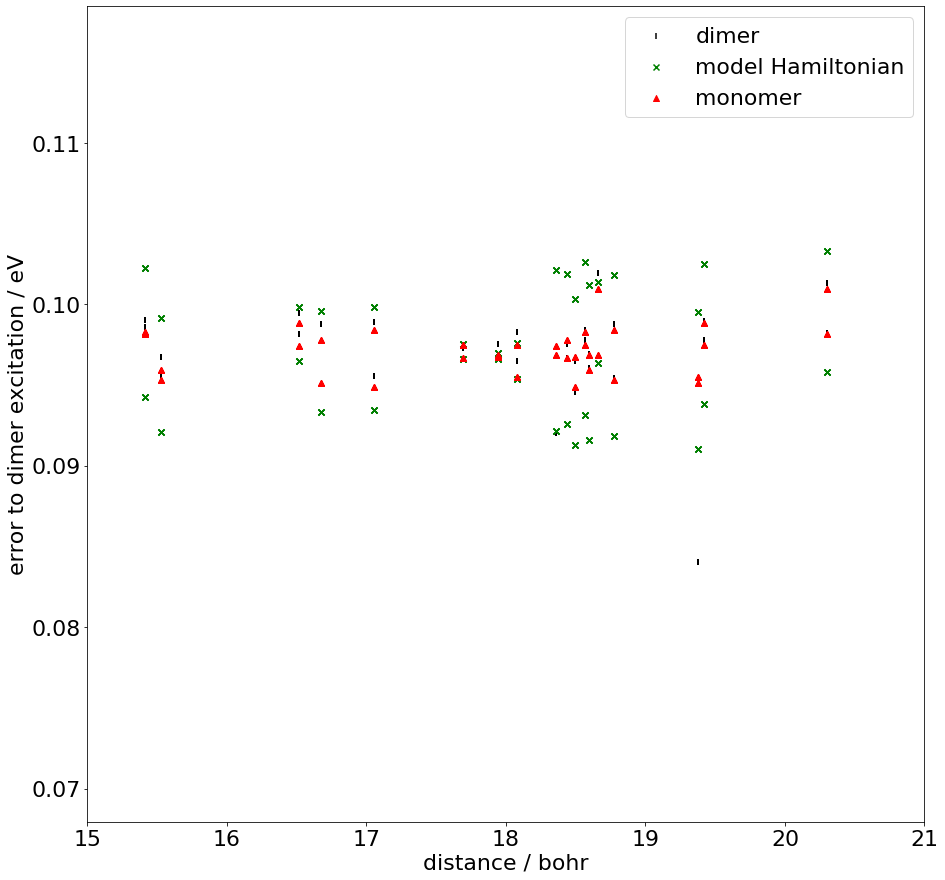

In [5]:
matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()

a=1
ax.scatter(distances, dimer_energies, marker='|', color='black', alpha=a, label='dimer')
ax.scatter(distances, dipole_interaction_energies, marker='x', color='green', alpha=a, label='model Hamiltonian')
ax.scatter(distances, monomer_energies, marker='^', color='red', alpha=a, label='monomer')

ax.legend()
ax.set_xlim(15, 21.0)
ax.set_xlabel("distance / bohr")
ax.set_ylabel("error to dimer excitation / eV")

fig.set_size_inches(15,15)


['B850a', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850a', 'B850b']
['B850a', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B850a', 'B850b']
['B850a', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B800', 'B850b']
['B850b', 'B850b']
['B800', 'B850b']
['B850a', 'B850b']
['B850b', 'B

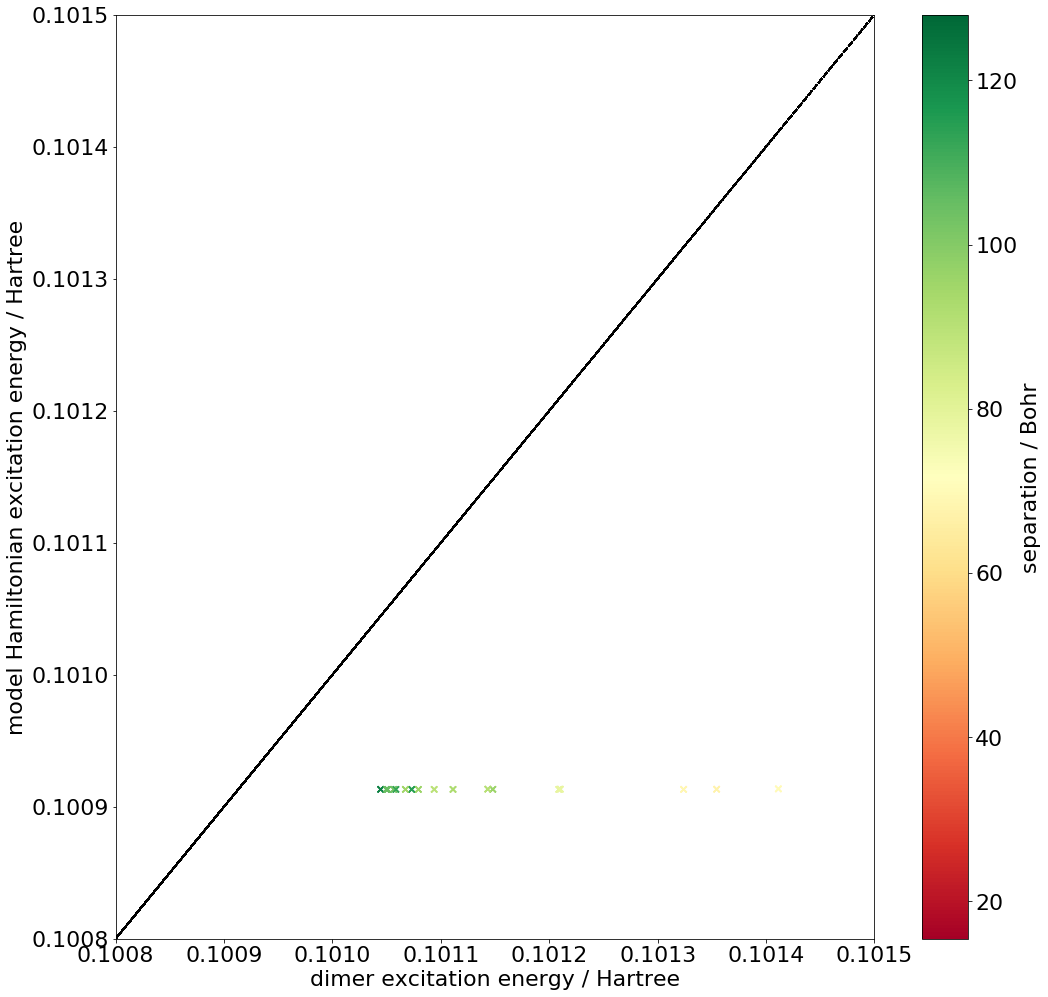

In [54]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, dipole_interaction_energies, c=distances, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(dimer_energies, dipole_interaction_energies, marker='x', alpha=a)
#ax.scatter(dimer_energies, charge_interaction_energies,  marker='o', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.1015
lower_lim = 0.1008

for i, dimer_energy in enumerate(dimer_energies):
    if dimer_energy > 0.1008 and dimer_energy < 0.1015:
        if dipole_interaction_energies[i] > 0.1008 and dipole_interaction_energies[i] < 0.1015:
            
            nums = re.findall(r'\d+', labels[i])[:-1]
            
            print([ring_labels["rings"][x] for x in nums])
            
            #print(labels[i], dipole_interaction_energies[i], dimer_energies[i])
            #ax.annotate(labels[i], (dimer_energies[i], dipole_interaction_energies[i]))

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(dimer_energies, dimer_energies, color='black', linestyle='--')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

#ax.hlines(monomer_energies, xmin=lower_lim, xmax=upper_lim, linestyles="--")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("separation / Bohr")
fig.set_size_inches(17,17)


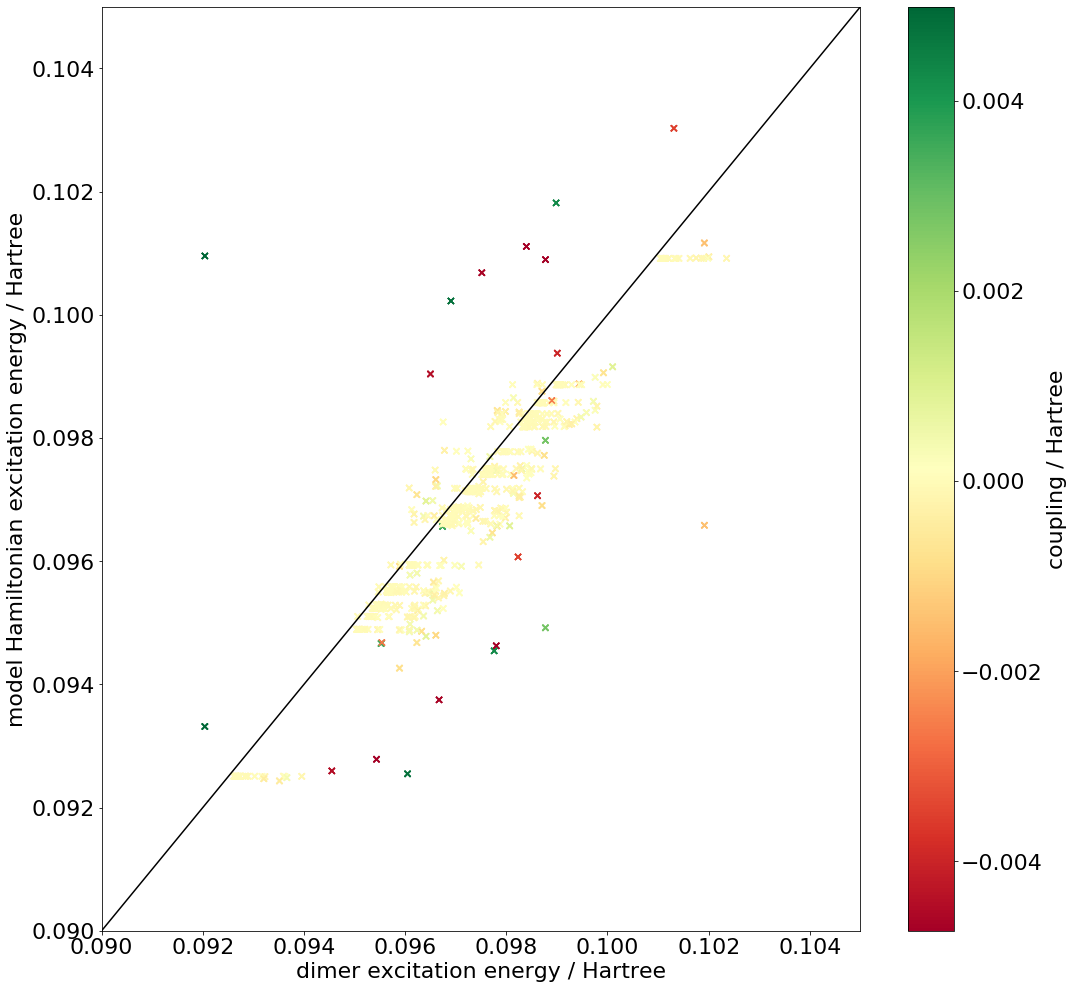

In [32]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, charge_interaction_energies, c=dipole_couplings, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.105
lower_lim = 0.09

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(ax.get_xlim(), ax.get_ylim(), color='black')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("coupling / Hartree")
fig.set_size_inches(17,17)


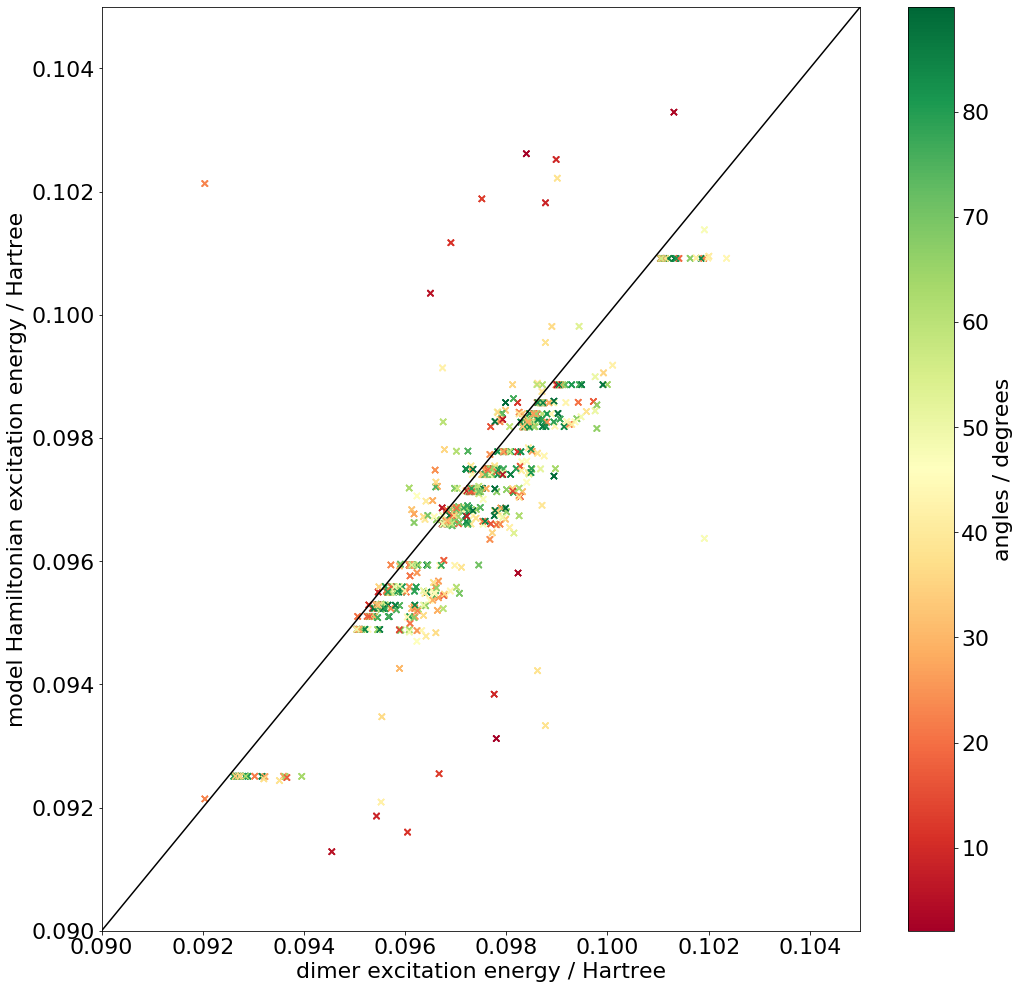

In [22]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, dipole_interaction_energies, c=angles, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.105
lower_lim = 0.09

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(ax.get_xlim(), ax.get_ylim(), color='black')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("angles / degrees")
fig.set_size_inches(17,17)

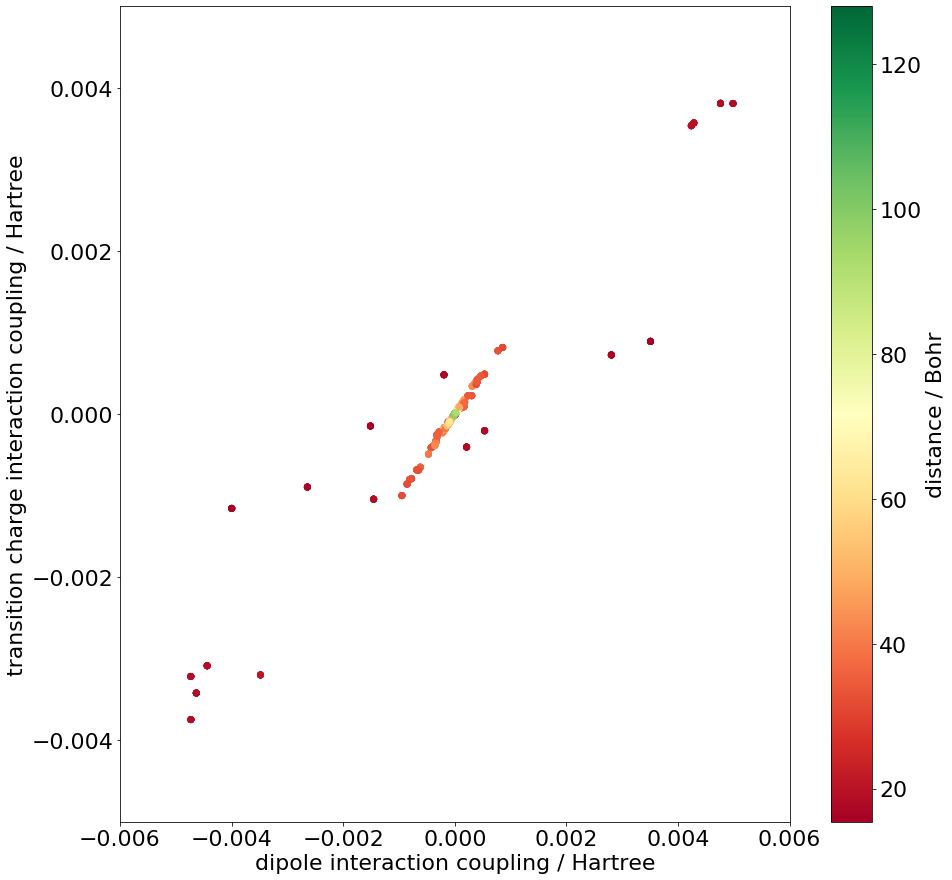

In [40]:
fig, ax = plt.subplots()

cax = ax.scatter(dipole_couplings, charge_couplings, c=distances, cmap='RdYlGn')
ax.set_ylim(-0.005, 0.005)
ax.set_xlim(-0.006, 0.006)
ax.set_xlabel("dipole interaction coupling / Hartree")
ax.set_ylabel("transition charge interaction coupling / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("distance / Bohr")
fig.set_size_inches(15,15)

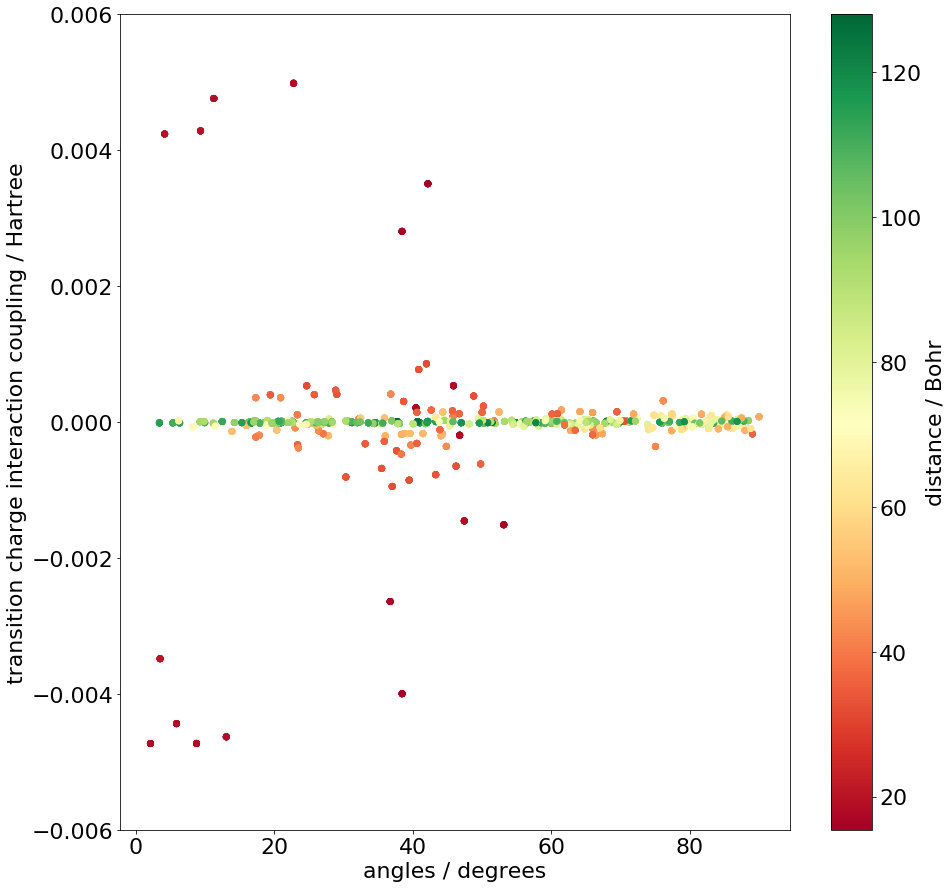

In [21]:
fig, ax = plt.subplots()

ax.scatter(angles, dipole_couplings, label="dipole", c=distances, cmap='RdYlGn')
#ax.scatter(angles, charge_couplings, label="charges", color='red', c=distances, cmap='RdYlGn')
#ax.legend()
ax.set_ylim(-0.006, 0.006)
ax.set_xlabel("angles / degrees")
ax.set_ylabel("transition charge interaction coupling / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("distance / Bohr")
fig.set_size_inches(15,15)

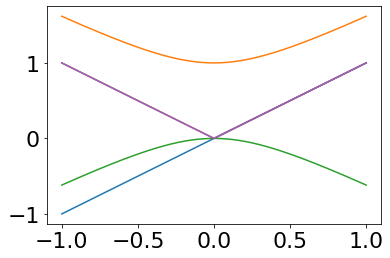

In [83]:
def two_by_two_mat(v, a, b):
    mat = np.array([a, v, v, b])
    mat = mat.reshape((2,2))

    vals, vecs = np.linalg.eig(mat)
    
    return vals

higher = []
lower = []

v = np.linspace(-1, 1, 1000)
v_pred0s = []
v_pred1s = []

for i in v:
    a = 0
    b = 1
    vals = two_by_two_mat(i, a, b)

    v_pred0 = np.sqrt(a*b - (a + b)*vals[0] + vals[0]*vals[0])
    v_pred1 = np.sqrt(a*b - (a + b)*vals[1] + vals[1]*vals[1])

    higher.append(max(vals))
    lower.append(min(vals))
    v_pred0s.append(v_pred0)
    v_pred1s.append(v_pred1)
    
fig, ax = plt.subplots()

ax.plot(v, v)
ax.plot(v, higher)
ax.plot(v, lower)
ax.plot(v, v_pred0s)
ax.plot(v, v_pred1s)